<a href="https://colab.research.google.com/github/noemicho/sentinela/blob/main/PlotMetricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

In [6]:
!pip install ultralytics

In [7]:
#caminho do arquivo de resultados
results_path = [
    "/content/drive/MyDrive/Resultados/set0/train4/results.csv",
    "/content/drive/MyDrive/Resultados/set1/train/results.csv",
    "/content/drive/MyDrive/Resultados/set2/train/results.csv",
    "/content/drive/MyDrive/Resultados/set3/train/results.csv",
    "/content/drive/MyDrive/Resultados/set4/train/results.csv"
]
#Caminho modelos
models_path = [
    "/content/drive/MyDrive/Resultados/set0/train4/weights/best.pt",
    "/content/drive/MyDrive/Resultados/set1/train/weights/best.pt",
    "/content/drive/MyDrive/Resultados/set2/train/weights/best.pt",
    "/content/drive/MyDrive/Resultados/set3/train/weights/best.pt",
    "/content/drive/MyDrive/Resultados/set4/train/weights/best.pt"
]

#caminho dados de teste
testData = "/content/drive/MyDrive/TestData/Images"
label_dir = "/content/drive/MyDrive/TestData/labels"

#lista com dataframe de cada modelo
metrics = ["train/cls_loss","val/cls_loss","metrics/recall(B)","metrics/precision(B)", "metrics/mAP50(B)"]
colors = ['blue', 'green', 'red', 'orange', 'purple']
results = []
for i,path in enumerate(results_path):
  df = pd.read_csv(path, delimiter=',')
  results.append(df)


Modelo: 0
Max: 3.084
Min: 0.325

Modelo: 1
Max: 3.055
Min: 0.306

Modelo: 2
Max: 3.104
Min: 0.317

Modelo: 3
Max: 3.112
Min: 0.317

Modelo: 4
Max: 3.138
Min: 0.328



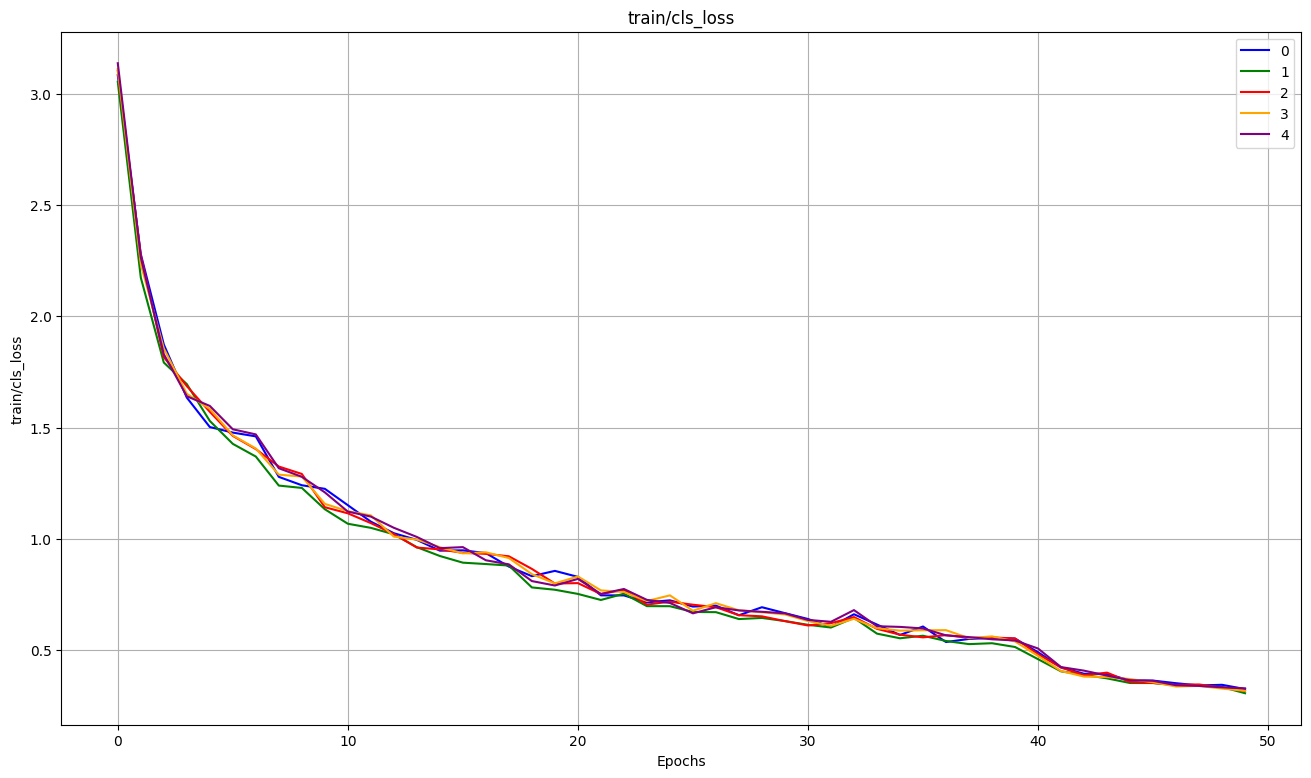

Modelo: 0
Max: 2.898
Min: 0.305

Modelo: 1
Max: 3.095
Min: 0.431

Modelo: 2
Max: 2.851
Min: 0.306

Modelo: 3
Max: 2.818
Min: 0.274

Modelo: 4
Max: 2.857
Min: 0.294



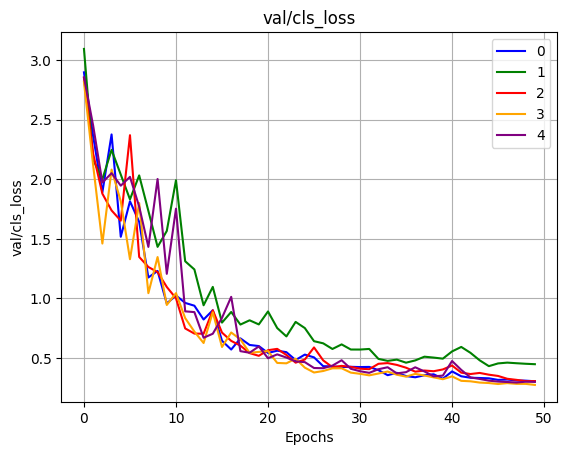

Modelo: 0
Max: 1.000
Min: 0.239

Modelo: 1
Max: 0.967
Min: 0.381

Modelo: 2
Max: 1.000
Min: 0.389

Modelo: 3
Max: 1.000
Min: 0.470

Modelo: 4
Max: 1.000
Min: 0.209



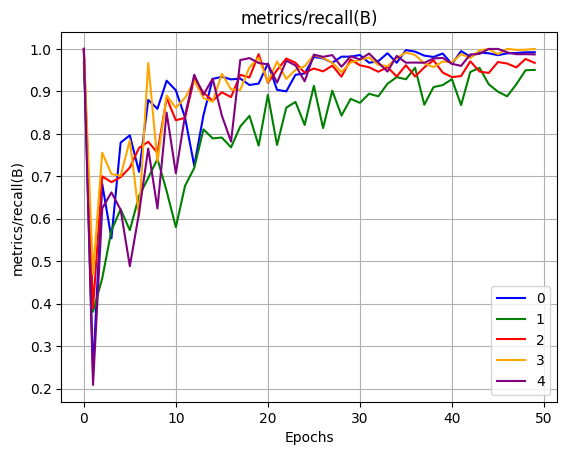

Modelo: 0
Max: 0.994
Min: 0.004

Modelo: 1
Max: 0.971
Min: 0.003

Modelo: 2
Max: 0.996
Min: 0.003

Modelo: 3
Max: 0.997
Min: 0.003

Modelo: 4
Max: 0.993
Min: 0.004



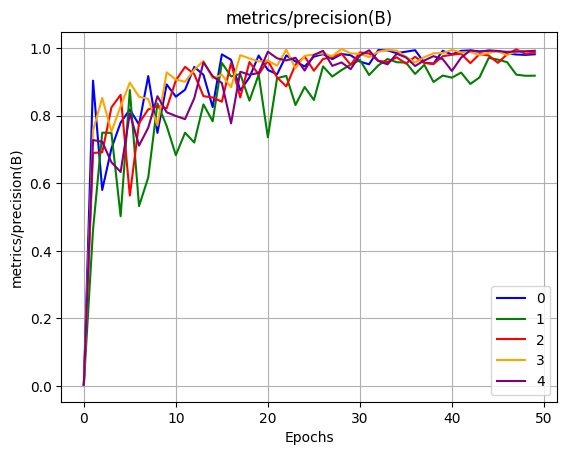

Modelo: 0
Max: 0.995
Min: 0.396

Modelo: 1
Max: 0.988
Min: 0.315

Modelo: 2
Max: 0.995
Min: 0.342

Modelo: 3
Max: 0.995
Min: 0.395

Modelo: 4
Max: 0.995
Min: 0.384



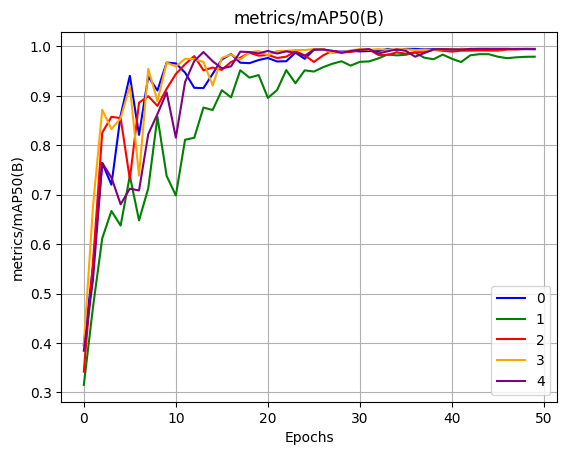

In [8]:
#Plotar gráfico para comparar desenpenho

plt.figure(figsize=(16,9))
for data in metrics:
  for i, model in enumerate(results):
    #Plota o valor de cada modelo e printa seu min e max
    plt.plot(model[data], label=i, color=colors[i])
    maxVal = max(model[data])
    minVal = min(model[data])
    print(f"Modelo: {i}\nMax: {maxVal:.3f}\nMin: {minVal:.3f}\n")

  plt.xlabel('Epochs')
  plt.ylabel(data)
  plt.title(data)
  plt.legend()
  plt.grid(True)
  plt.show()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Resposta: {0}
Previsão: {0}
ACERTO!

Resposta: {2}
Previsão: {2}
ACERTO!

Resposta: {3}
Previsão: {1, 3}
ERRO!

Resposta: {3}
Previsão: {3}
ACERTO!

Resposta: {1}
Previsão: {1}
ACERTO!

Resposta: {1}
Previsão: {1}
ACERTO!

Resposta: {0}
Previsão: {0}
ACERTO!

Resposta: {1}
Previsão: {1}
ACERTO!

Resposta: {3}
Previsão: {3}
ACERTO!

Resposta: {0}
Previsão: {0}
ACERTO!

Resposta: {0}
Previsão: {0}
ACERTO!

Resposta: {2}
Previsão: {2}
ACERTO!

Resposta: {1}
Previsão: {1}
ACERTO!

Resposta: {3}
Previsão: {3}
ACERTO!

Resposta: {0}
Previsão: {0}
ACERTO!

Resposta: {2}
Previsão: {2}
ACERTO!

Resposta: {3}
Previsão: {3}
ACERTO!

Resposta: {1}
Previsão: {1}
ACERTO!

Resposta: {0}
Previsão

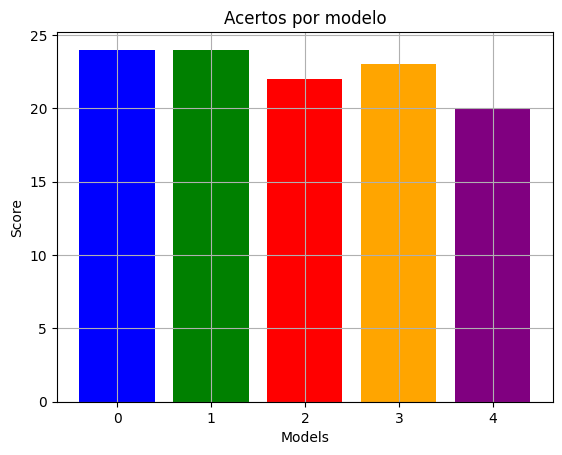

In [9]:
from ultralytics import YOLO

# Iterar pelos modelos no caminho
for i, path in enumerate(models_path):
    model = YOLO(path)
    score = 0

    # Iterar pelas imagens no conjunto de teste
    for imageName in os.listdir(testData):
        if imageName.endswith((".jpg", ".png", ".jpeg")):
            image = os.path.join(testData, imageName)

            # Realizar a previsão
            results = model.predict(image, verbose=False)
            predictions = results[0].boxes.data  # Previsões: [x_min, y_min, x_max, y_max, conf, class]

            # Caminho do label verdadeiro
            label_path = os.path.join(label_dir, Path(imageName).stem + ".txt")
            if not os.path.exists(label_path):
                print(f"Label não encontrado para {imageName}")
                continue

            # Ler os labels verdadeiros
            with open(label_path, 'r') as f:
                true_labels = [line.strip().split() for line in f.readlines()]  # [class, x_center, y_center, width, height]

            # Extrair classes verdadeiras e previstas
            true_classes = {int(lbl[0]) for lbl in true_labels}  # Conjunto de classes verdadeiras na imagem
            predicted_classes = {int(pred[5]) for pred in predictions}  # Conjunto de classes previstas na imagem

            # Exibir informações no console
            print(f"Resposta: {true_classes}")
            print(f"Previsão: {predicted_classes}")

            # Verificar se as classes previstas coincidem com as verdadeiras
            if true_classes == predicted_classes:
                score += 1
                print("ACERTO!\n")
            else:
                print("ERRO!\n")

    print(f"Model {i} score: {score}\n\n\n")
    plt.bar(i, score, color=colors[i])
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Acertos por modelo')
plt.grid(True)
plt.show()